# Dataset Description and Overview

In [1]:
#Import relevant libraries
import numpy as np
import pandas as pd
pd.set_option('max_columns', 150)

import gc
import os

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#import utility functions from script
from utils import *

#configure plots from matplotlib
matplotlib.rcParams['figure.dpi'] = 180 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size

#set seaborn style for plots
sns.set_style('darkgrid')

color = sns.color_palette()

#Data file directory
root = 'C:/Users/ALEXANDER/Documents/Machine Learning/Instacart/Data/'

##Ignore Warning
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Check files in data directory
os.listdir(root)

['aisles',
 'departments',
 'orders',
 'order_products__prior',
 'order_products__train',
 'products']

In [3]:
#Read datasets
aisles = read(root,path='aisles')
departments = read(root,path='departments')
orders = read(root,path='orders')
order_products_prior = read(root,path='order_products__prior')
order_products_train = read(root,path='order_products__train')
products = read(root,path="products")

## Aisles  Data

In [4]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [5]:
print(f"Number of Unique aisles in data: {aisles.aisle.nunique()}")
aisles['aisle'].unique()

Number of Unique aisles in data: 134


array(['prepared soups salads', 'specialty cheeses',
       'energy granola bars', 'instant foods',
       'marinades meat preparation', 'other', 'packaged meat',
       'bakery desserts', 'pasta sauce', 'kitchen supplies',
       'cold flu allergy', 'fresh pasta', 'prepared meals',
       'tofu meat alternatives', 'packaged seafood', 'fresh herbs',
       'baking ingredients', 'bulk dried fruits vegetables',
       'oils vinegars', 'oral hygiene', 'packaged cheese', 'hair care',
       'popcorn jerky', 'fresh fruits', 'soap', 'coffee', 'beers coolers',
       'red wines', 'honeys syrups nectars', 'latino foods',
       'refrigerated', 'packaged produce', 'kosher foods',
       'frozen meat seafood', 'poultry counter', 'butter',
       'ice cream ice', 'frozen meals', 'seafood counter',
       'dog food care', 'cat food care', 'frozen vegan vegetarian',
       'buns rolls', 'eye ear care', 'candy chocolate', 'mint gum',
       'vitamins supplements', 'breakfast bars pastries',
       '

## Departments Data

In [6]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [7]:
print(f"Number of Unique Departments in data: {departments.nunique()}")
departments['department'].unique()

Number of Unique Departments in data: department_id    21
department       21
dtype: int64


array(['frozen', 'other', 'bakery', 'produce', 'alcohol', 'international',
       'beverages', 'pets', 'dry goods pasta', 'bulk', 'personal care',
       'meat seafood', 'pantry', 'breakfast', 'canned goods',
       'dairy eggs', 'household', 'babies', 'snacks', 'deli', 'missing'],
      dtype=object)

## Orders Data
This dataset contains all the orders made by different customers. 

In [8]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [10]:
orders['order_id'].nunique(), orders['user_id'].nunique()

(3421083, 206209)

- From, the analysis above. We can infer that there were 3421083 orders made by 206209 customers.

In [11]:
#Get number of orders made by customers.
order_number = orders.groupby('user_id')['order_number'].max()
order_number = order_number.value_counts()

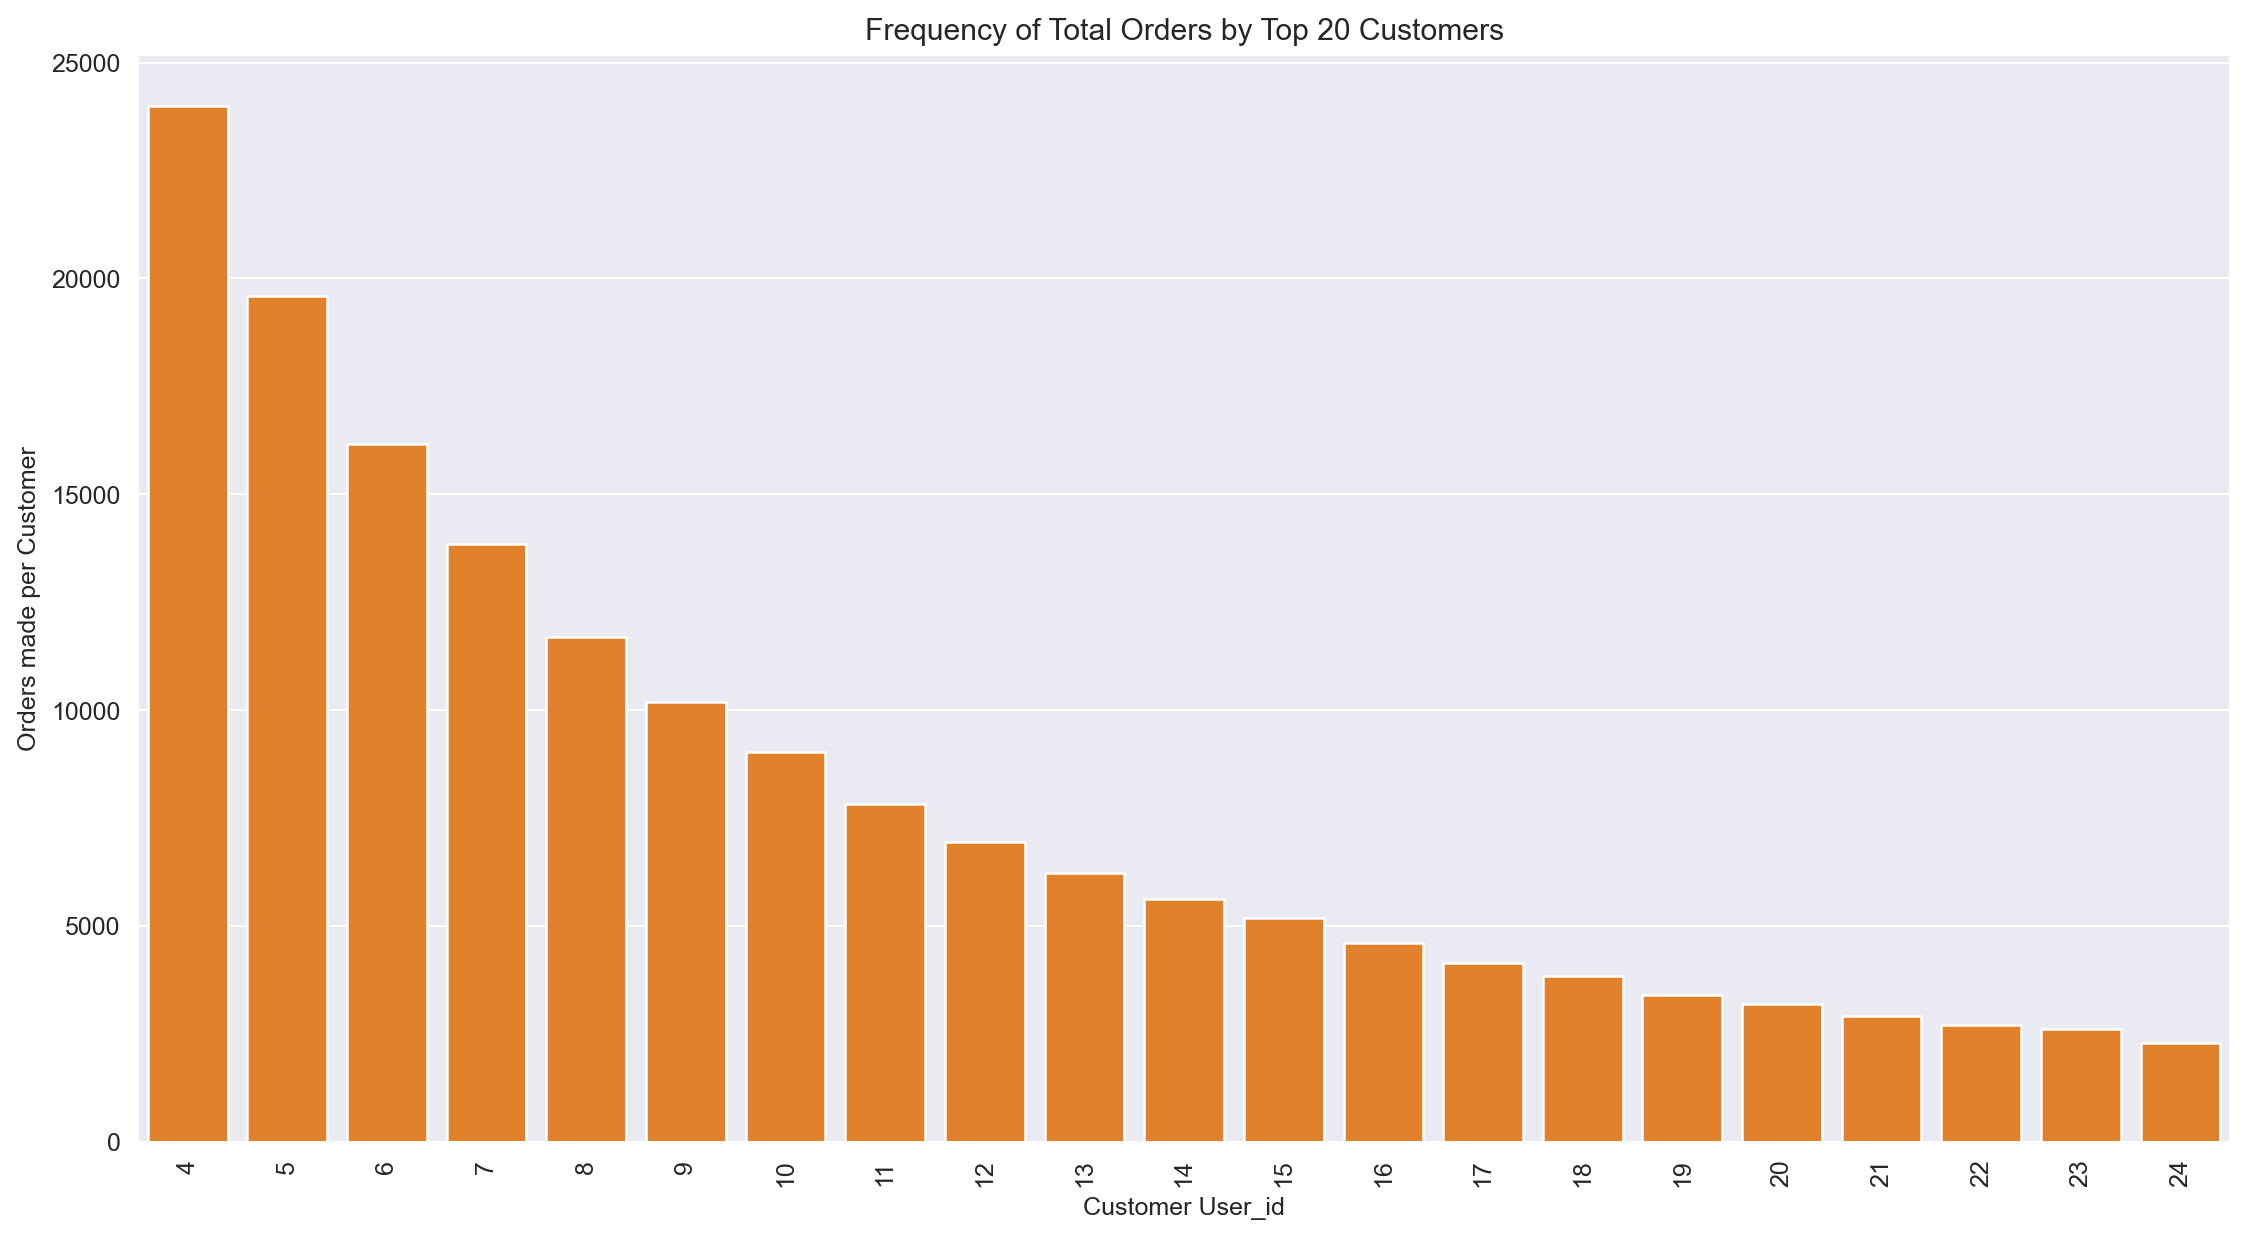

In [28]:
#Visualize top 20 customers who made the most orders.
bar_visual(df=order_number[:21], xlabel='Customer User_id',
           ylabel="Orders made per Customer", title="Frequency of Total Orders by Top 20 Customers")

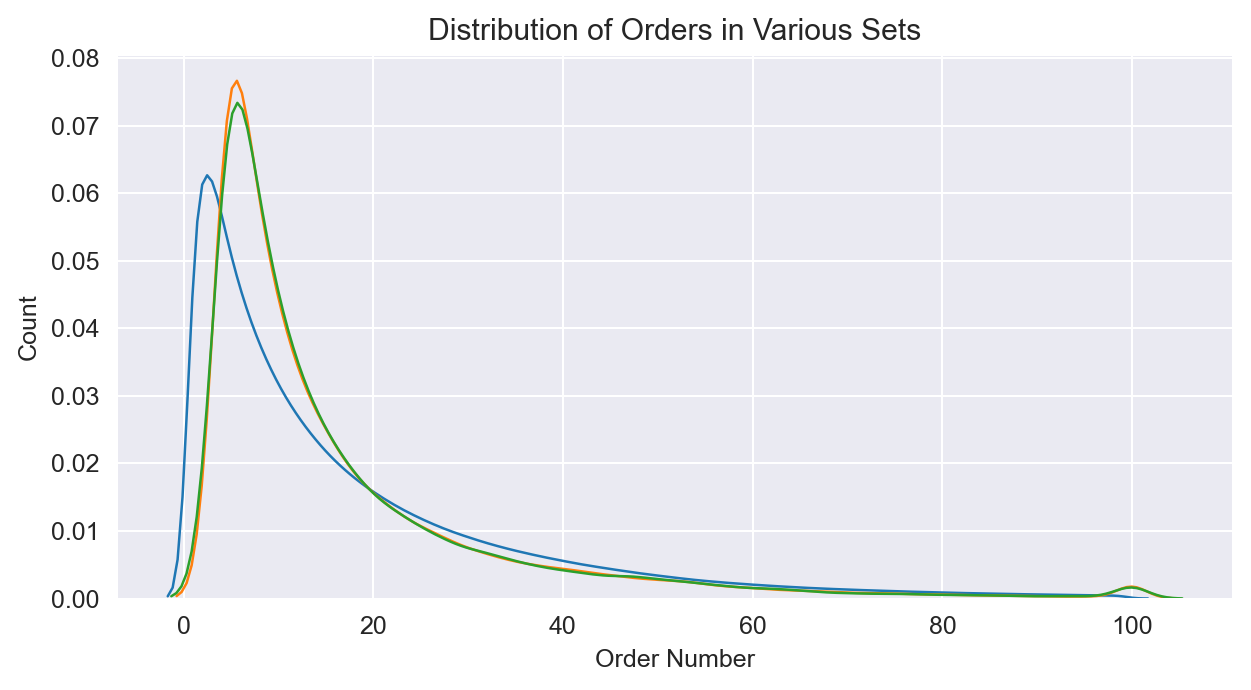

In [13]:
#Check distribution of orders in various data subsets

fig, ax = plt.subplots(figsize = (8,4))
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'prior'], label = "Prior set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'train'], label = "Train set", lw = 1)
ax = sns.kdeplot(orders.order_number[orders.eval_set == 'test'], label = "Test set", lw = 1)
ax.set_xlabel('Order Number')
ax.set_ylabel('Count')
ax.tick_params(axis = 'both', labelsize = 10)
ax.set_title('Distribution of Orders in Various Sets')
fig.savefig('Distribution of Orders in Various Sets.png')
plt.show()

- There are three sets of orders: `Prior`, `Train` and `Test`. The distributions of orders in Train and Test sets are similar whereas the distribution of orders in Prior set is different.
- The total orders per customer ranges from 0 to 100.

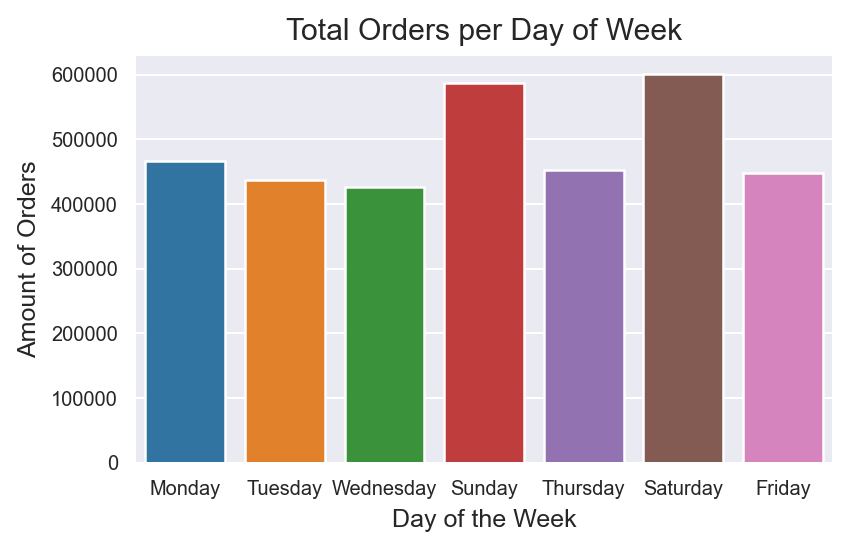

In [14]:
#Check distribution of orders per weekday
day_map={2:"Monday",3:"Tuesday",4:"Wednesday",
                         5:"Thursday",6:"Friday",0:"Saturday",
                         1:"Sunday"}
daily_order = orders.order_dow.replace(day_map)
fig, ax = plt.subplots(figsize = (5,3))
ax = sns.countplot(daily_order)
ax.set_xlabel('Day of the Week', size = 10)
ax.set_ylabel('Amount of Orders', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Total Orders per Day of Week')
fig.savefig('Total Orders per Day of Week.png')
plt.show()

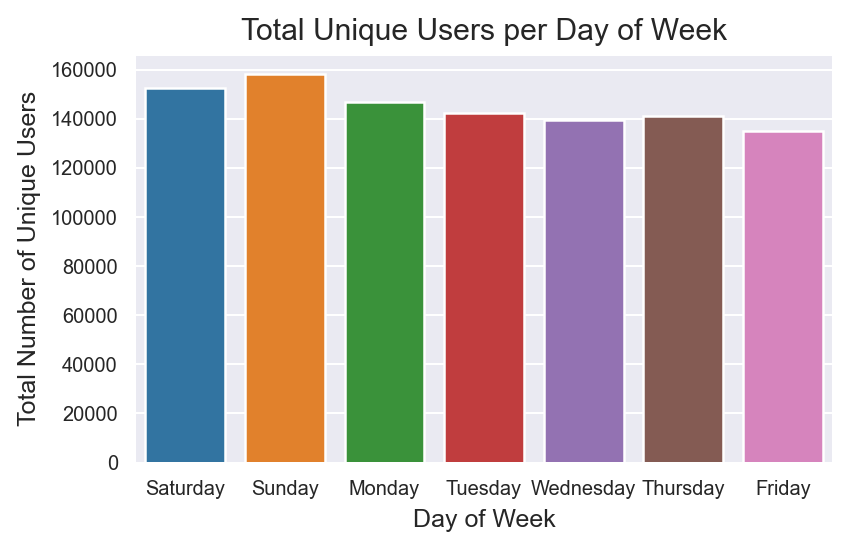

In [15]:
temp_df = orders.groupby('order_dow')['user_id'].nunique()
temp_df.index = ["Saturday","Sunday","Monday","Tuesday","Wednesday","Thursday","Friday"]
fig, ax = plt.subplots(figsize = (5,3))
ax = sns.barplot(x = temp_df.index, y = temp_df.values)
ax.set_xlabel('Day of Week', size = 10)
ax.set_ylabel('Total Number of Unique Users', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.set_title('Total Unique Users per Day of Week')
fig.savefig('Total Unique Users per Day of Week.png')
plt.show()

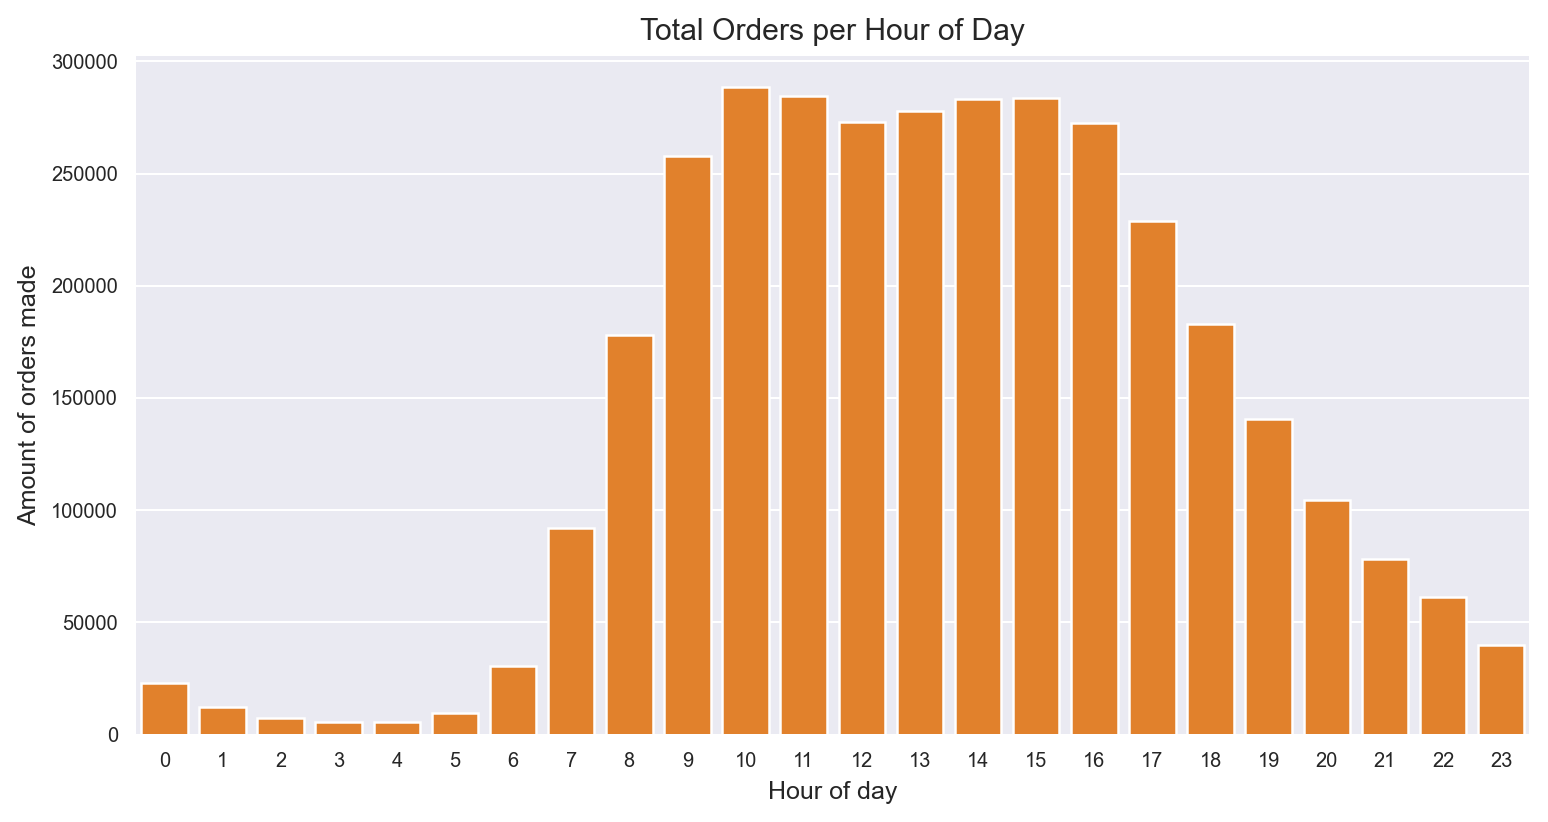

In [16]:

count_viz(df=orders.order_hour_of_day,xlabel="Hour of day",
          ylabel="Amount of orders made",title="Total Orders per Hour of Day")    

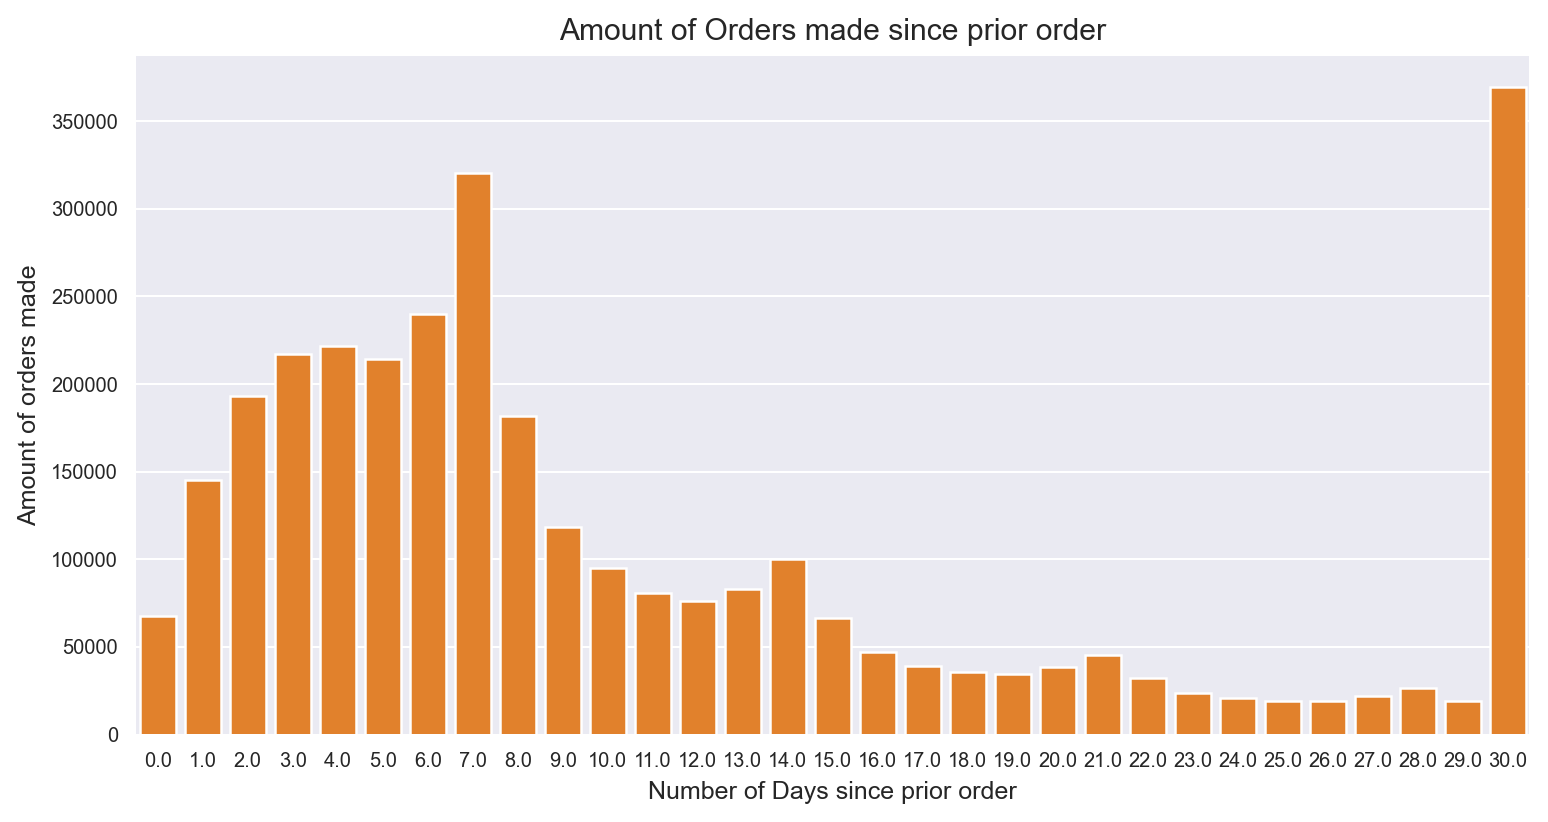

In [17]:
count_viz(df=orders.days_since_prior_order, xlabel="Number of Days since prior order",
          ylabel="Amount of orders made",title="Amount of Orders made since prior order")    

In [21]:
temp_df = orders.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
temp_df = temp_df.pivot('order_dow', 'order_hour_of_day', 'order_number')
temp_df.head()

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,48465,51035,51443,53849,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,55671,51584,47079,46728,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,39230,38128,35780,36650,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,36040,35215,33455,34161,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,35034,33857,32249,32751,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645


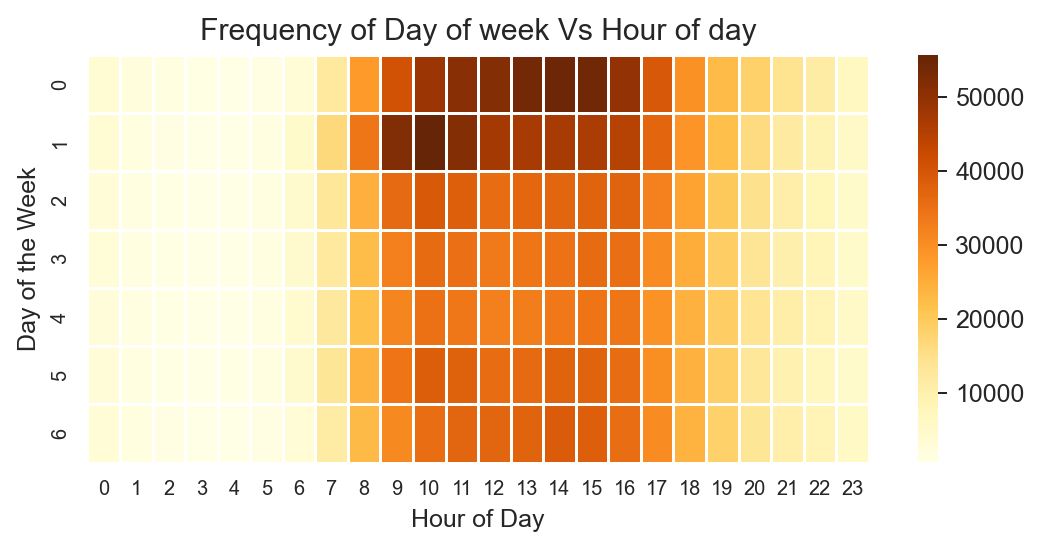

{2: 'Monday', 3: 'Tuesday', 4: 'Wednesday', 5: 'Thursday', 6: 'Friday', 0: 'Saturday', 1: 'Sunday'}


In [23]:
ax = plt.subplots(figsize=(7,3))
temp_df.index=[0,1,2,3,4,5,6]
ax = sns.heatmap(temp_df, cmap="YlOrBr", linewidths=.5)
ax.set_title("Frequency of Day of week Vs Hour of day", size = 12)
ax.set_xlabel("Hour of Day", size = 10)
ax.set_ylabel("Day of the Week", size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10)
fig = ax.get_figure()
fig.savefig("Frequency of Day of week Vs Hour of day.png")
plt.show()

print(day_map)

- From this heatmap, we can infer that:
    - Most orders were made druing day time.
    - Saturday afternoons and Sunday mornings are prime time for orders, i.e most of people buy groceries on weekends.
    - Less orders during the early hours of the morning. This is in line with real-life expectations as most customers are asleep during this period.

The dataset was divided into thre: `Prior`, `Train` and `Test`. Each containing data on items that were ordered.

## order_products_prior dataset
This dataset contains details on the items that were ordered and the order in which they were put in the shopping cart. It also lets us know whether or not the goods was ordered again.

In [24]:
order_products_prior.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [26]:
print(f"Number of Unique Products in data: {order_products_prior['product_id'].nunique()}")
print(f"Number of Orders made in prior in data: {order_products_prior['order_id'].nunique()}")


Number of Unique Products in data: 49677
Number of Orders made in prior in data: 3214874


In [27]:
add_to_cart_order_prior = order_products_prior.groupby('order_id')['add_to_cart_order'].count().value_counts()
add_to_cart_order_prior.head()

5    228330
6    227675
4    222081
7    220006
3    207027
Name: add_to_cart_order, dtype: int64

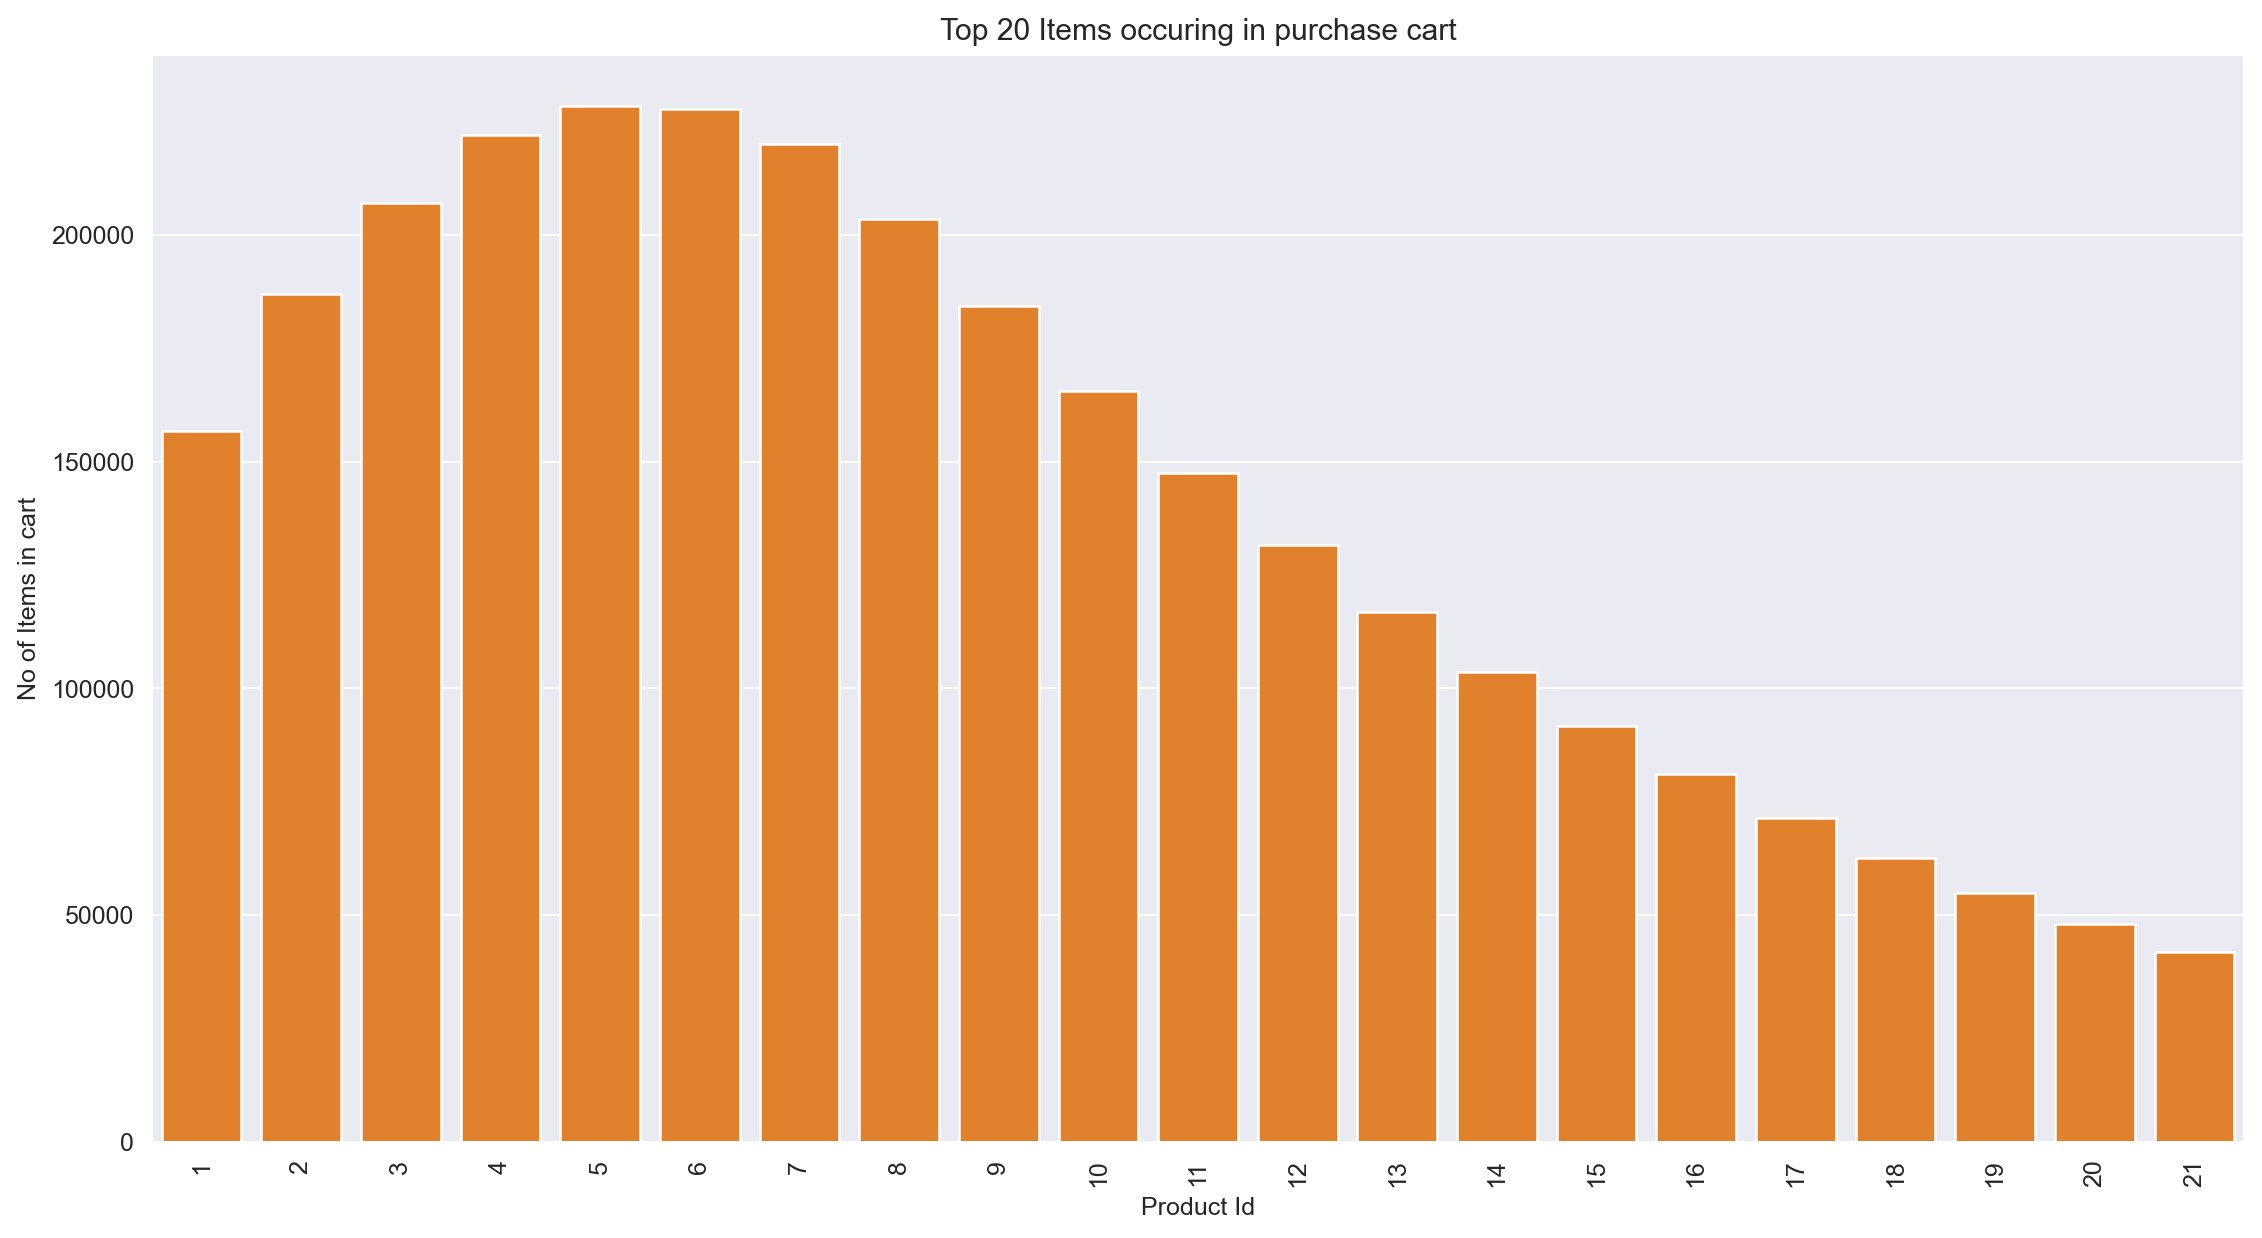

In [56]:
#Top 20 most occuring products in carts (prior dataset)
bar_visual(df=add_to_cart_order_prior[:21], xlabel='Product Id',
           ylabel="No of Items in cart", title="Top 20 Items occuring in purchase cart")

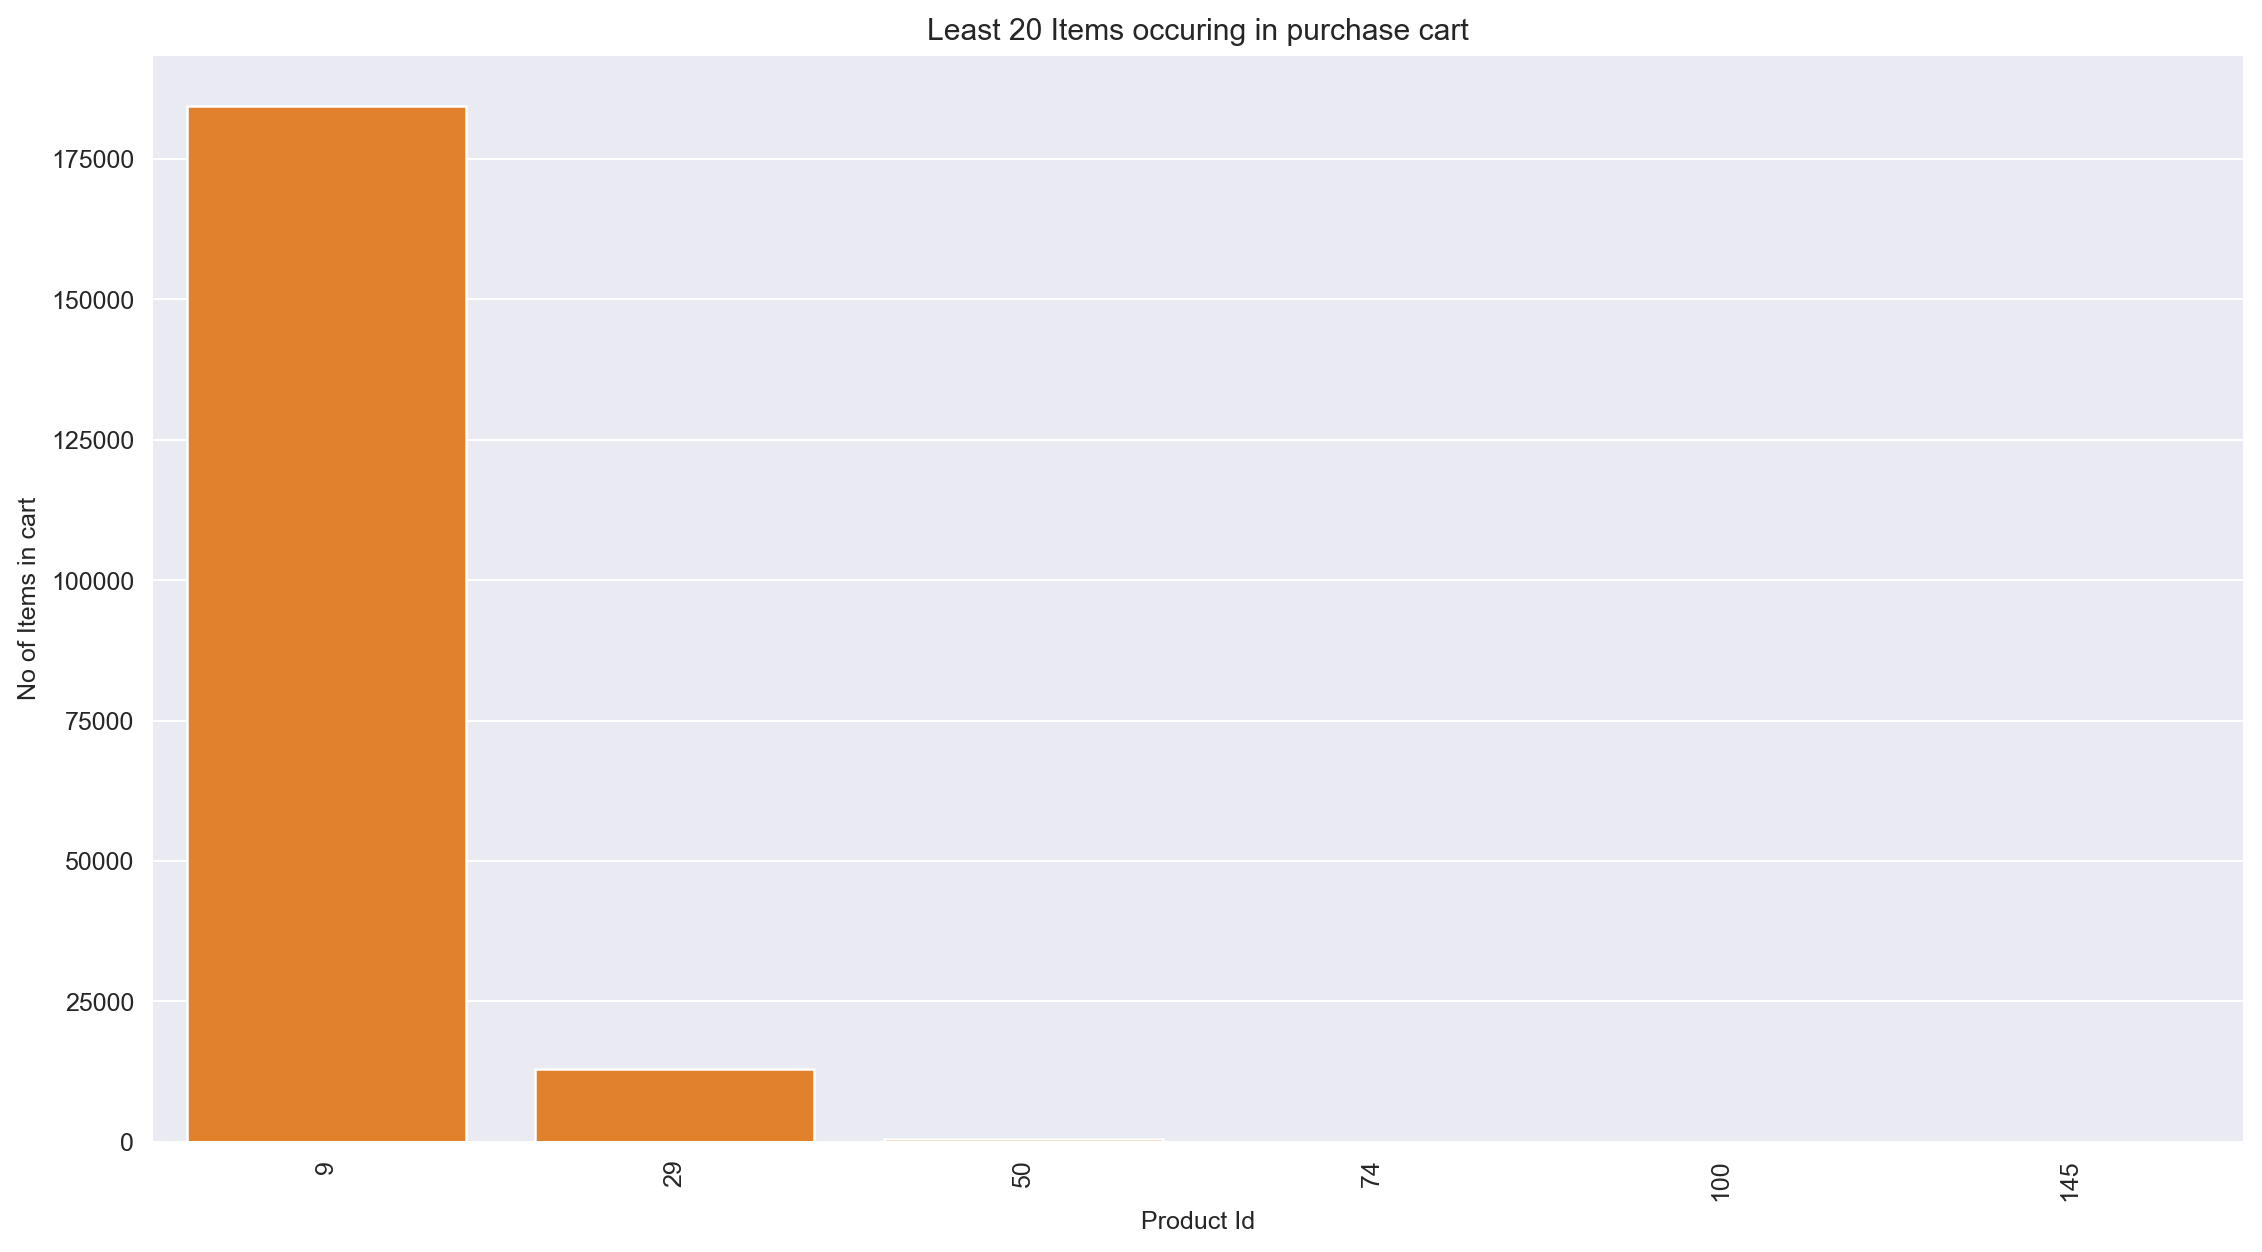

In [57]:
#Top 20 most occuring products in carts (prior dataset)

bar_visual(df=add_to_cart_order_prior[::-21], xlabel='Product Id',
           ylabel="No of Items in cart", title="Least 20 Items occuring in purchase cart")

In [58]:
add_to_cart_order_prior.tail()

114    1
112    1
94     1
90     1
145    1
Name: add_to_cart_order, dtype: int64

- From this chart, we can infer that say that most customers buy 1-15 items in an order.
- The maximum number of items in a single order is 145.

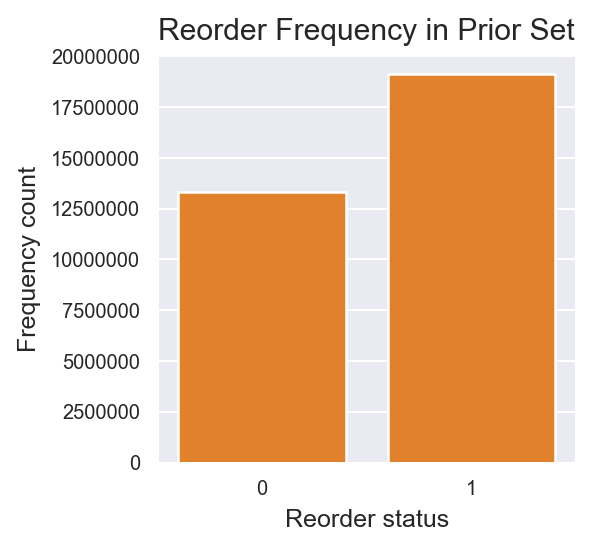

In [31]:
fig, ax = plt.subplots(figsize=(3,3))
ax = sns.barplot(x = order_products_prior.reordered.value_counts().index, 
                y = order_products_prior.reordered.value_counts().values, color = color[1])
ax.set_xlabel('Reorder status', size = 10)
ax.set_ylabel('Frequency count', size = 10)
ax.tick_params(axis = 'both', labelsize = 8)
ax.ticklabel_format(style='plain', axis='y')
ax.set_title('Reorder Frequency in Prior Set')
fig.savefig('Reorder Frequency in Prior Set')
plt.show()

In [32]:
print('Percentage of reorder in prior set:',
      format(order_products_prior[order_products_prior.reordered == 1].shape[0]*100/order_products_prior.shape[0], '.2f'))

Percentage of reorder in prior set: 58.97


- The percentage of reorder items in this set is 58.97%.

## Order_products_train
This dataset gives information about which products were ordered and in which order they were added in the cart. It also tells us that if the product was reordered or not.

In [49]:
order_products_train.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [51]:
print(f"Number of Unique Products in data: {order_products_train['product_id'].nunique()}")
print(f"Number of Orders made in train data: {order_products_train['order_id'].nunique()}")


Number of Unique Products in data: 39123
Number of Orders made in train data: 131209


In [55]:
add_to_cart_order_train = order_products_prior.groupby('order_id')['add_to_cart_order']\
                .count().value_counts()
add_to_cart_order_train.head()

5    228330
6    227675
4    222081
7    220006
3    207027
Name: add_to_cart_order, dtype: int64

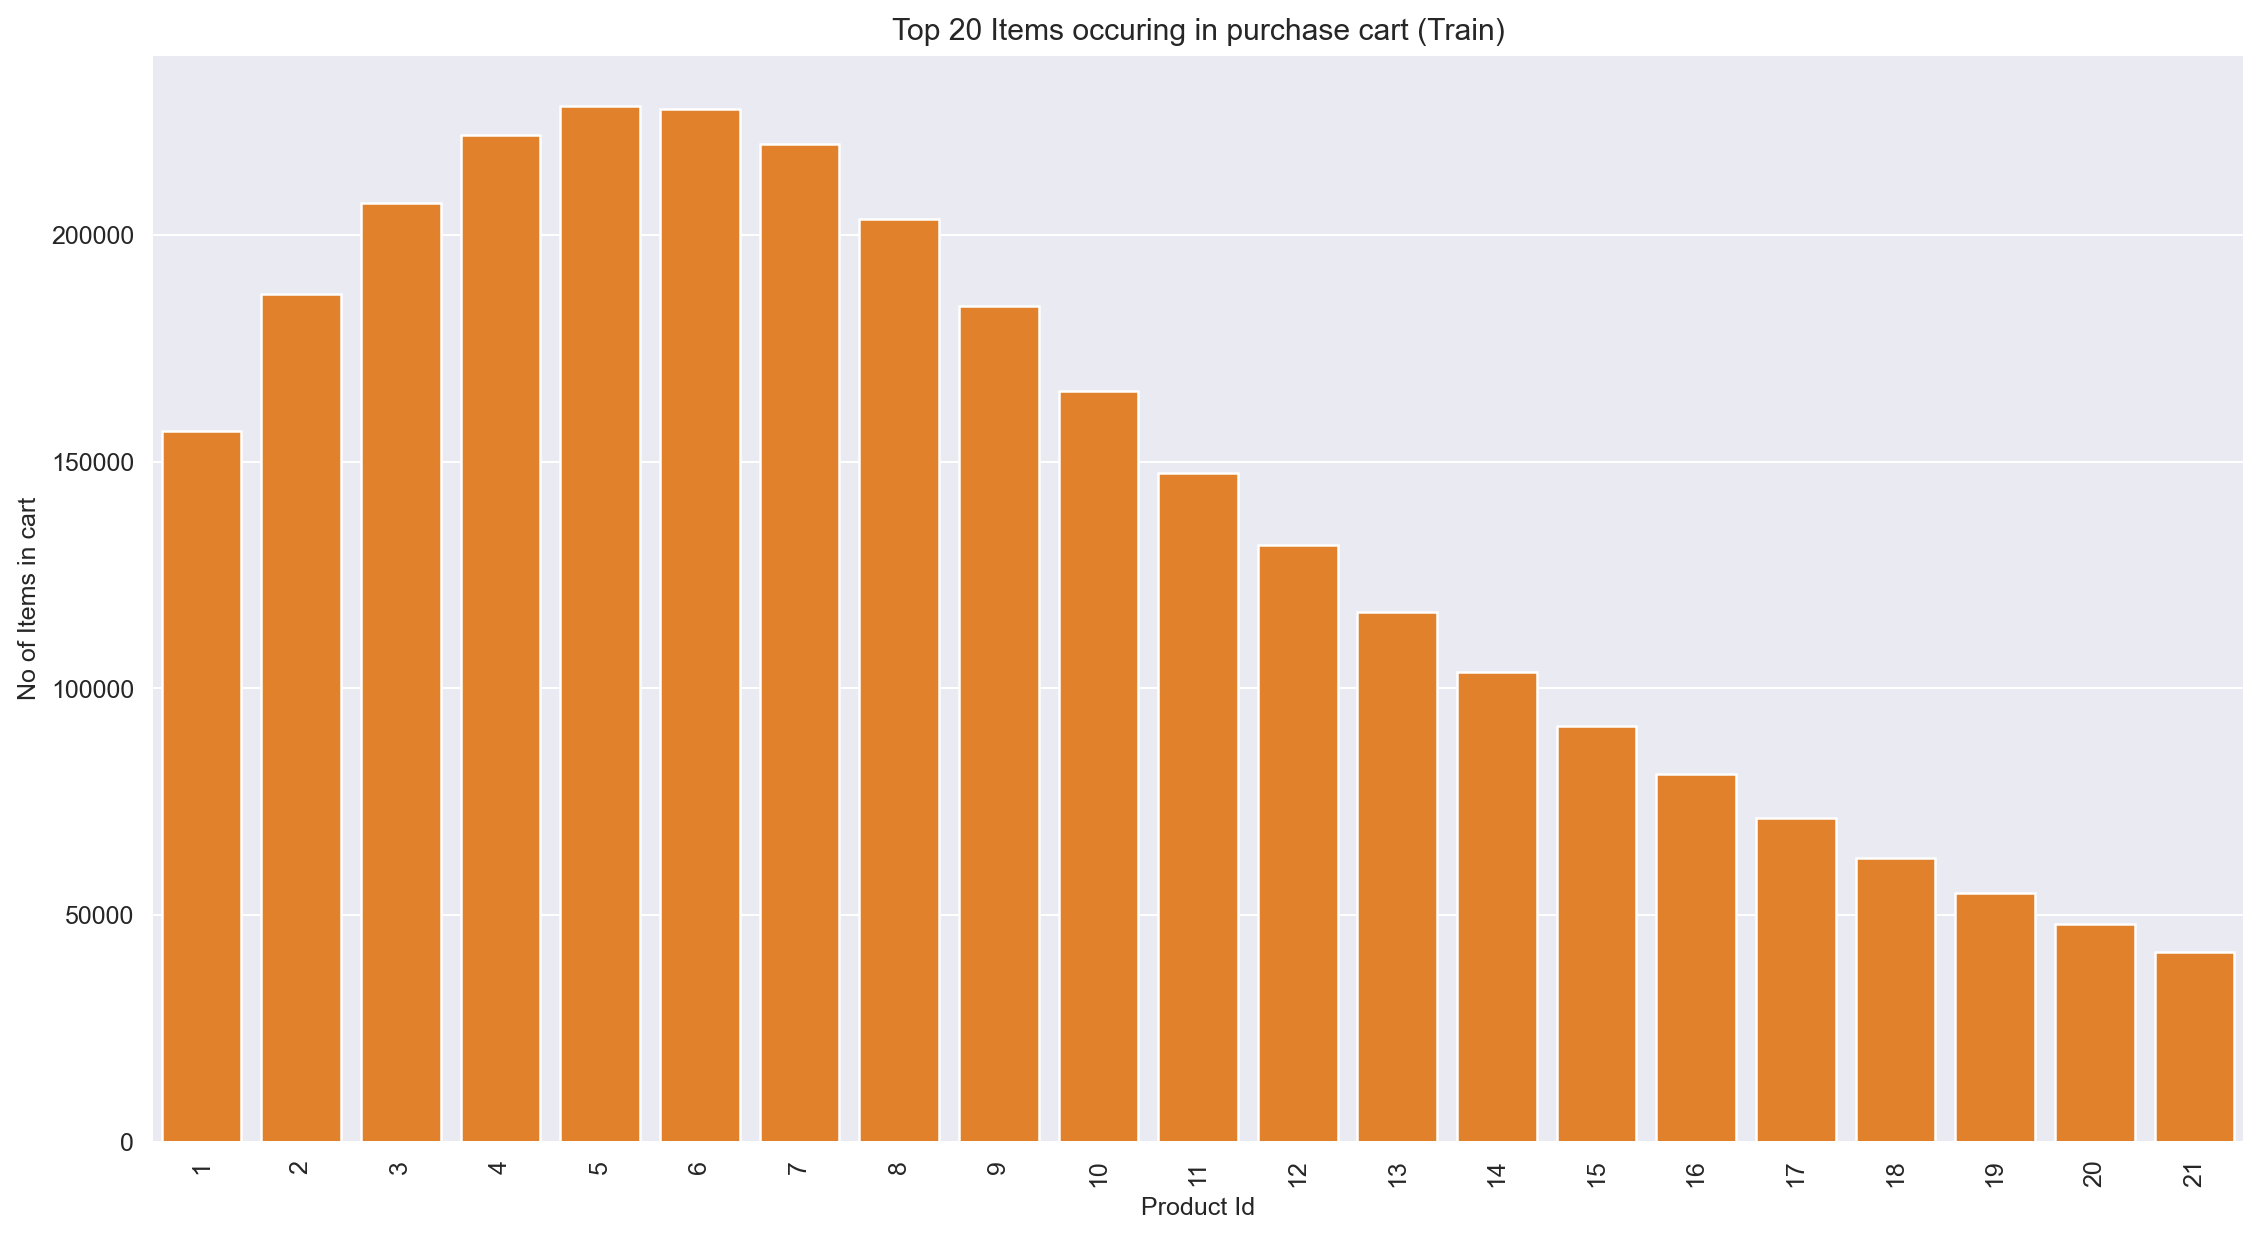

In [59]:

#Top 20 most occuring products in carts (prior dataset)
bar_visual(df=add_to_cart_order_train[:21], xlabel='Product Id',
           ylabel="No of Items in cart", title="Top 20 Items occuring in purchase cart (Train)")

In [61]:
print('Percentage of reorder in train set:',
      format(order_products_train[order_products_train.reordered == 1].shape[0]*100/order_products_train.shape[0], '.2f'))

Percentage of reorder in train set: 59.86


## products

This dataset contains the list of total 49688 products and their aisle as well as department. 

In [62]:
products.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [63]:
print(f"Number of Unique Products in data: {products['product_name'].nunique()}")
print(f"Number of product aisles in train data: {products['aisle_id'].nunique()}")
print(f"Number of Unique Departments in train data: {products['department_id'].nunique()}")


Number of Unique Products in data: 49688
Number of product aisles in train data: 134
Number of Unique Departments in train data: 21


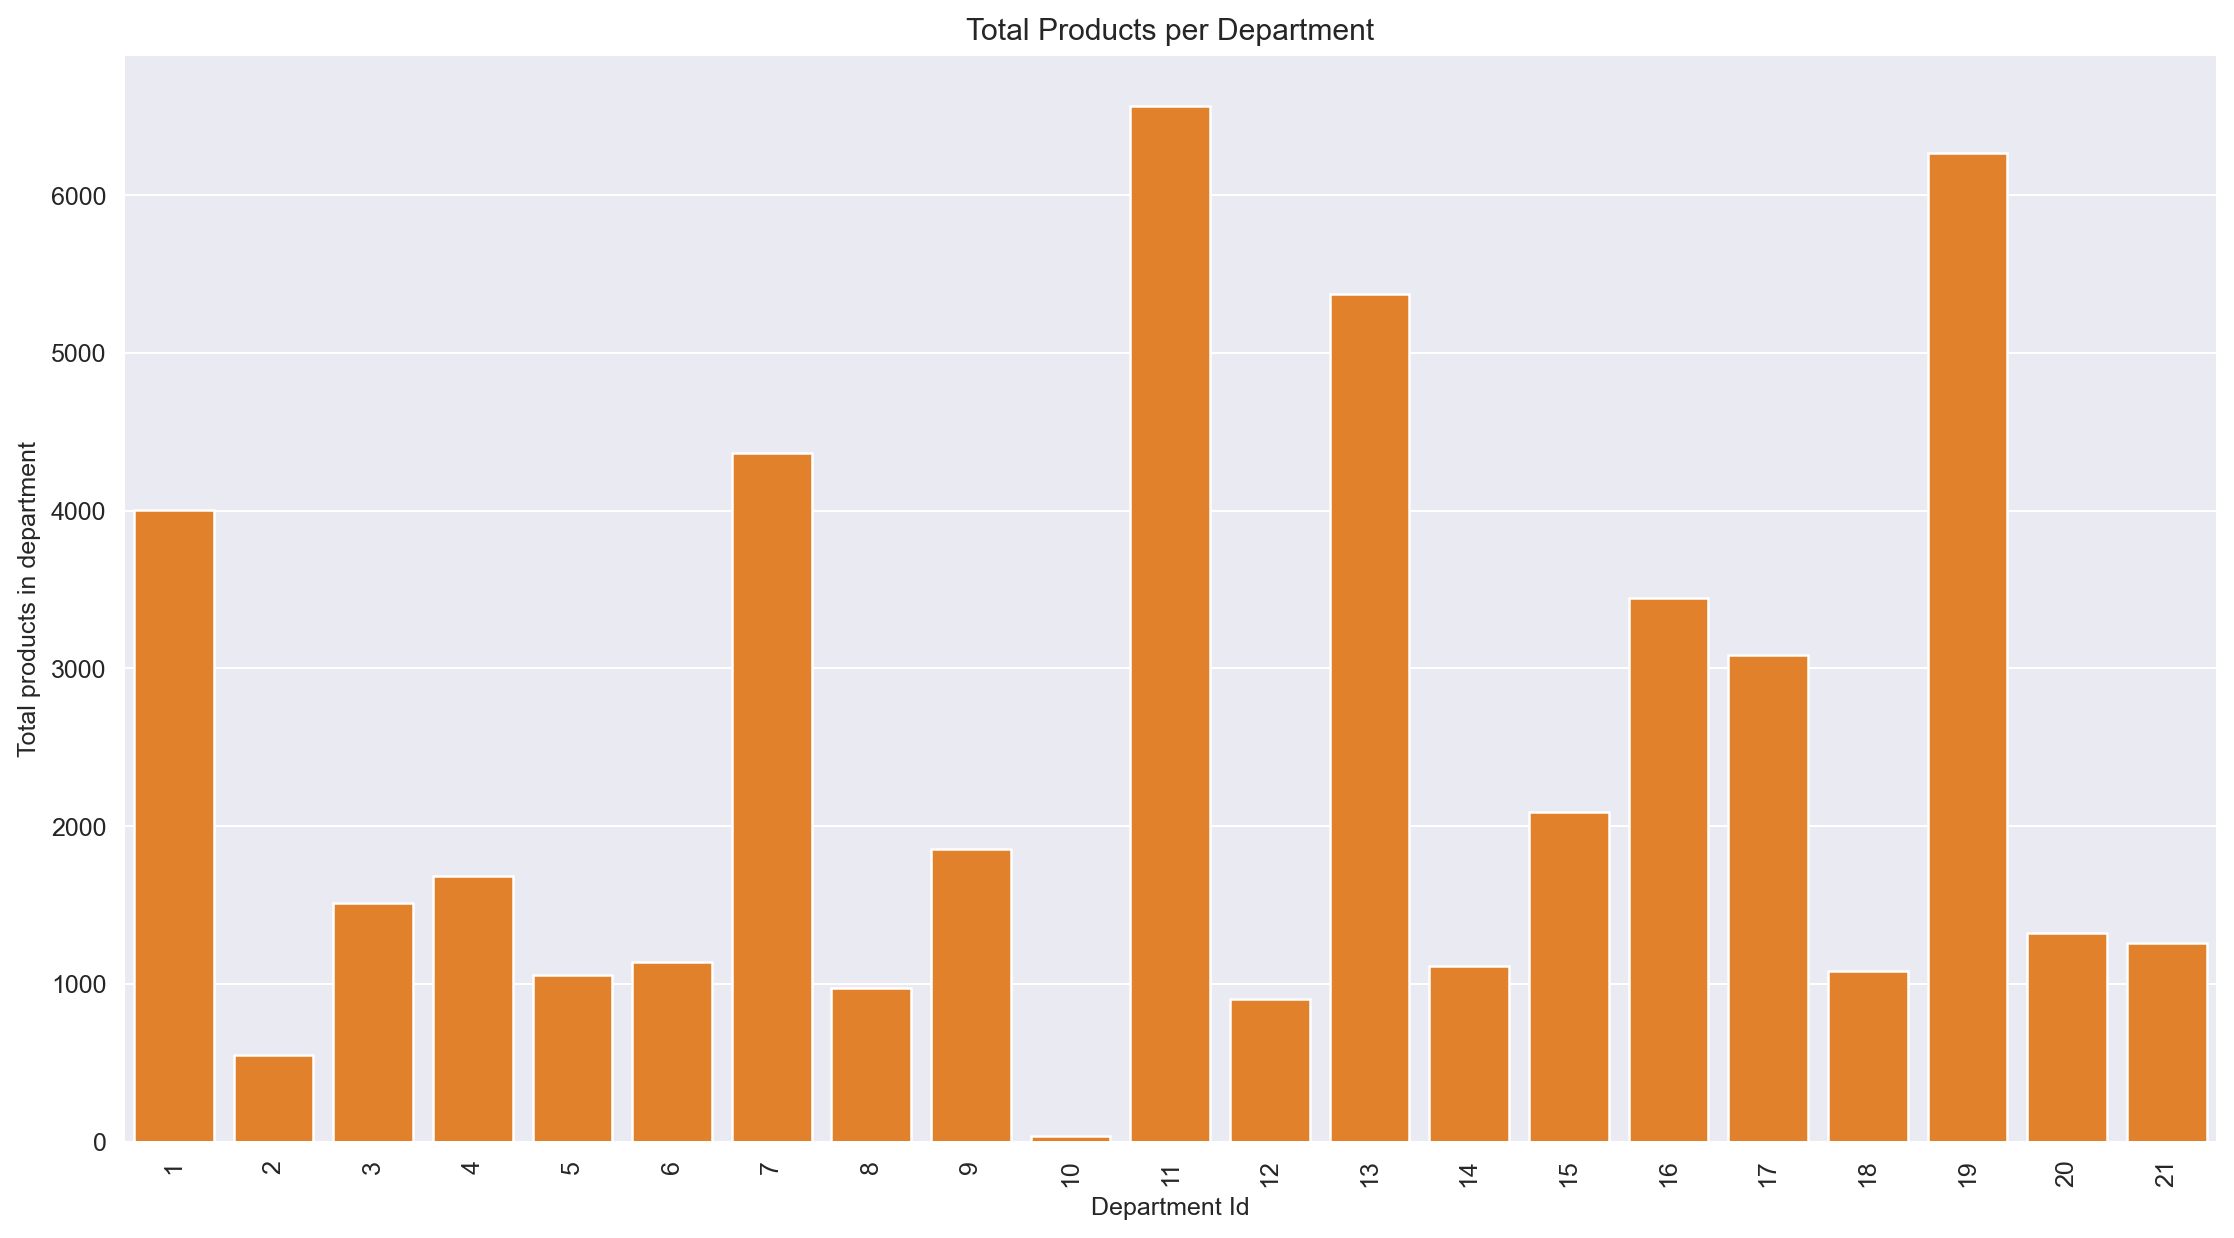

In [66]:

#Visualize total number of products in each department.
total_df = products.groupby('department_id')['product_id'].count()

bar_visual(df=total_df, ylabel="Total products in department",
           xlabel="Department Id", title="Total Products per Department")


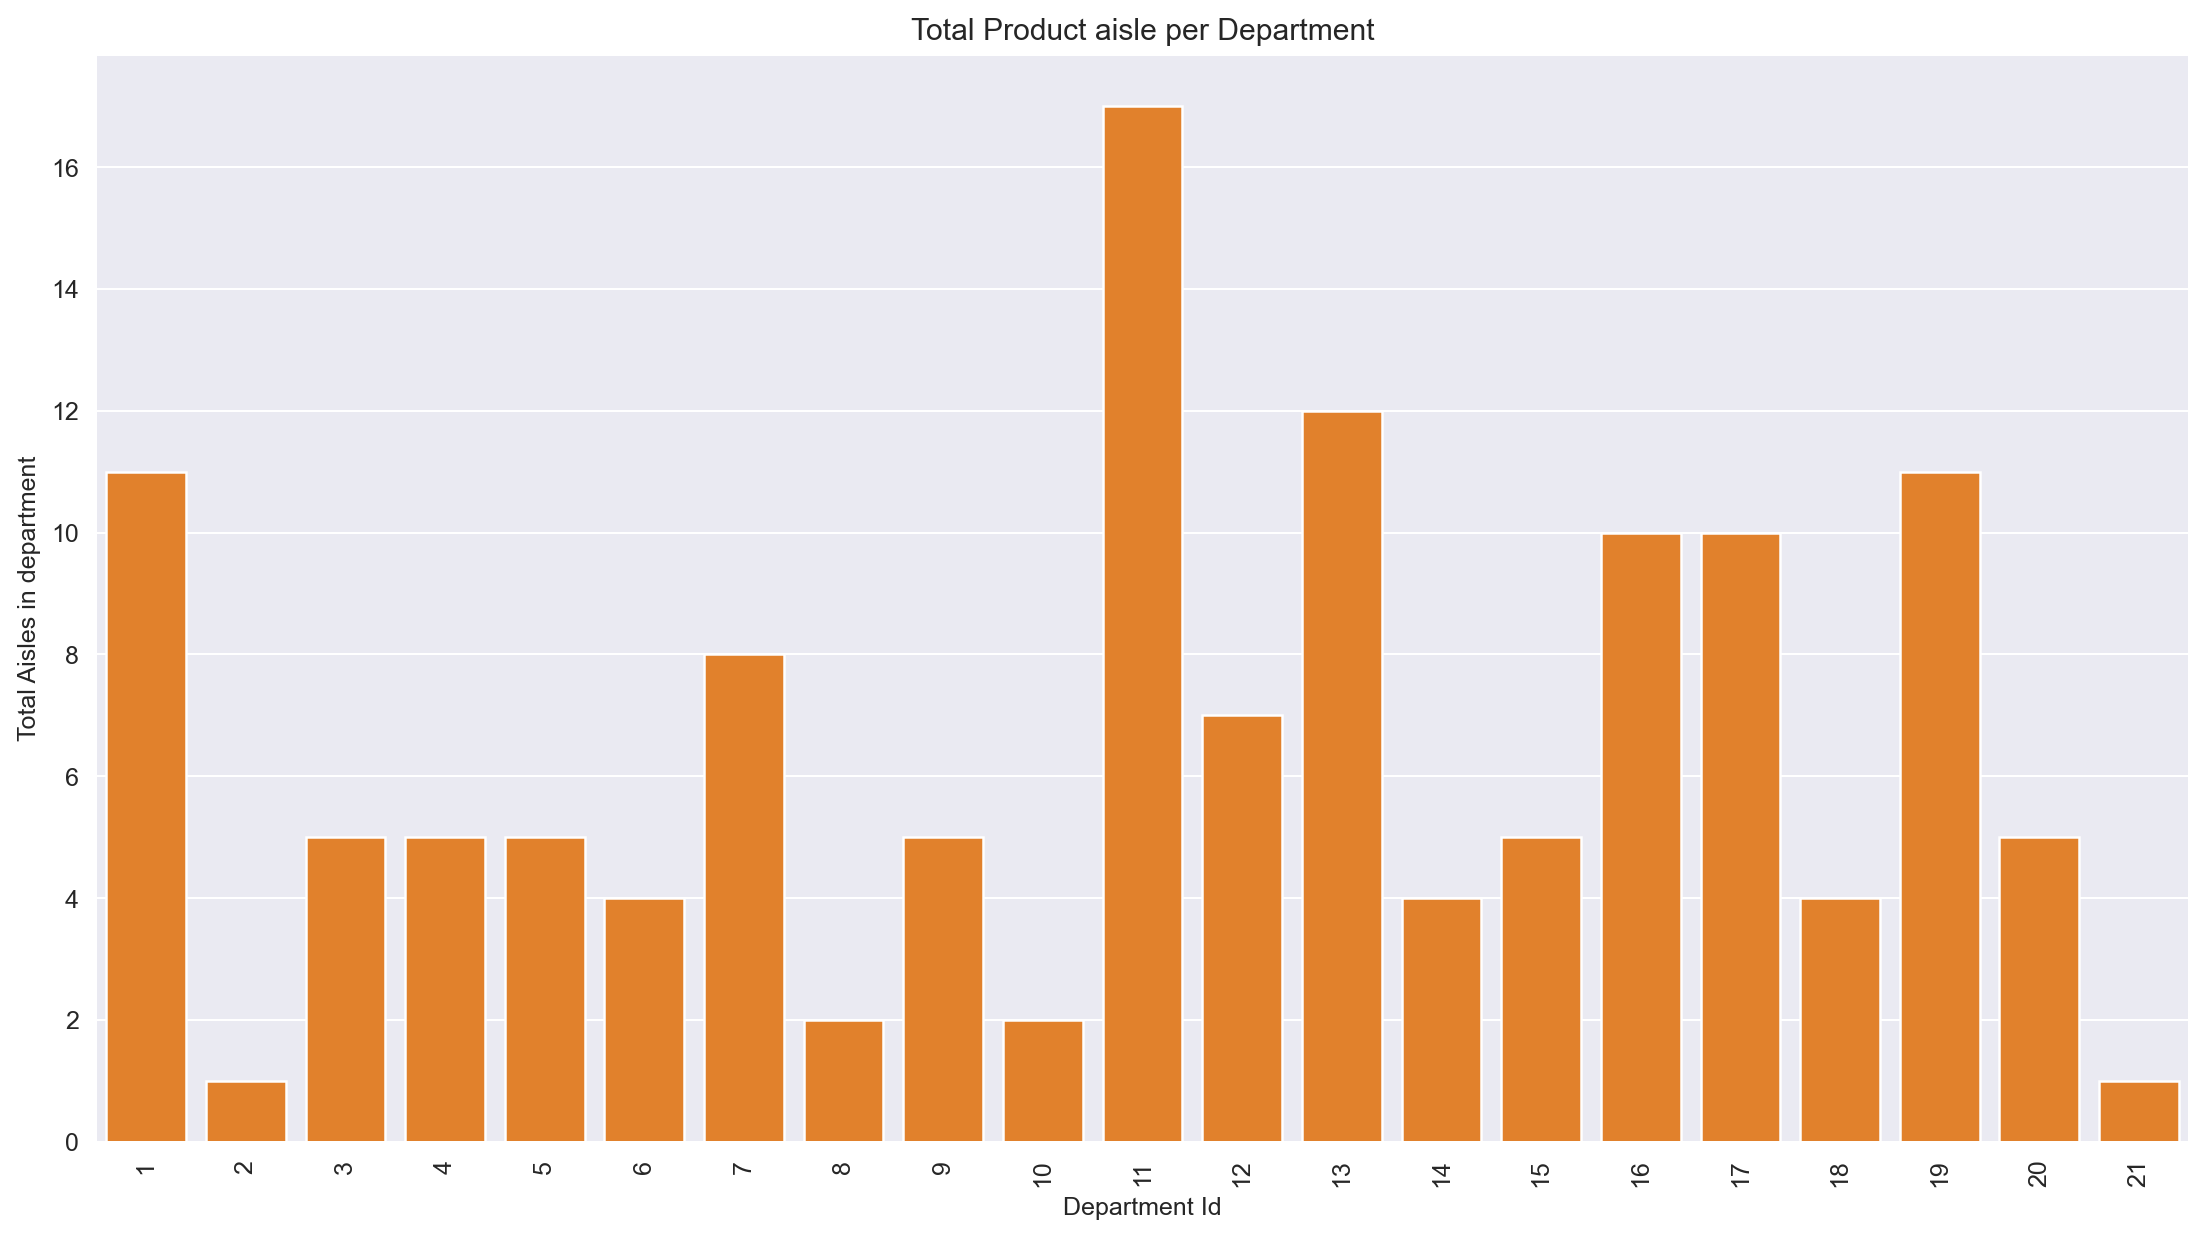

In [67]:
total_df = products.groupby('department_id')['aisle_id'].nunique()

bar_visual(df=total_df, ylabel="Total Aisles in department",
           xlabel="Department Id", title="Total Product aisle per Department")
